When we are given 10 hours to build a model,we will work 6 hours to build the dataset ~dataScientist

UnderStand the dataset by

    check for null/missing values and replace
    check for outliers
    
and perform your analysis further

Importing all the nessecary packages for work

In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


Analysing given dataset

In [17]:
#Reading the dataSet using panda
data = pd.read_csv("/Users/harikrishnareddy/Desktop/nyc_taxi_trip_duration Dataset.csv")

In [18]:
#lets see what we got in here like shape,types and look for any null values or duplicates in dataSet
print(data.shape)
print(f'In the given dataSet the No.of rows are {data.shape[0]} & columns are {data.shape[1]}')

(729322, 11)
In the given dataSet the No.of rows are 729322 & columns are 11


In [19]:
print(data.dtypes)

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object


id - a unique identifier for each trip

vendor_id - a code indicating the provider associated with the trip record

pickup_datetime - date and time when the meter was engaged

dropoff_datetime - date and time when the meter was disengaged

passenger_count - the number of passengers in the vehicle (driver entered value)

pickup_longitude - the longitude where the meter was engaged

pickup_latitude - the latitude where the meter was engaged

dropoff_longitude - the longitude where the meter was disengaged

dropoff_latitude - the latitude where the meter was disengaged

store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)

trip_duration - (target) duration of the trip in seconds

In [20]:
print("The number of null values in each column\n",data.isnull().sum())

The number of null values in each column
 id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


As we can see from the dtypes we should change the few given types

    pickup_datetime,dropoff_datetime are  objects converting to datetime

this will help to predict the data more accurate

In [21]:
data['pickup_datetime'] = pd.to_datetime(data.pickup_datetime)
data['dropoff_datetime'] = pd.to_datetime(data.dropoff_datetime)
data[['pickup_datetime','dropoff_datetime']].dtypes

pickup_datetime     datetime64[ns]
dropoff_datetime    datetime64[ns]
dtype: object

In [22]:
data['store_and_fwd_flag'].value_counts()

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64

we shall plot the graph of all the continous variables

In [23]:
print(data['trip_duration'].describe(),"\n")
#If you remember the dataSet trip_duratoin is seconds so we will convert them seonds or hours by dividing it 3600(hours)
print('\n',data['trip_duration'].describe()/3600)

count    7.293220e+05
mean     9.522291e+02
std      3.864626e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.630000e+02
75%      1.075000e+03
max      1.939736e+06
Name: trip_duration, dtype: float64 


 count    202.589444
mean       0.264508
std        1.073507
min        0.000278
25%        0.110278
50%        0.184167
75%        0.298611
max      538.815556
Name: trip_duration, dtype: float64


what 538 hours,this is our outlier in the given data for 'trip_duration'

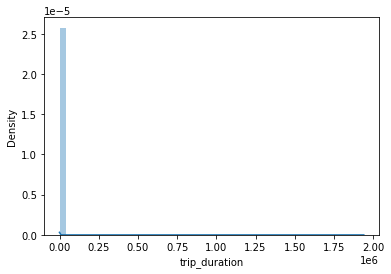

In [24]:
sns.distplot(data['trip_duration'])
plt.show()

If this was in bell curve we could have analyzed but it not in that way,we can use 

     LOG Transform
     When our original continuous data do not follow the bell curve(consits of outliers), we can log transform this data to make it as 'normal', so that our statistical analysis becomes more valid

In [25]:
plt.figure(figsize=(20, 5))

<Figure size 1440x360 with 0 Axes>

<Figure size 1440x360 with 0 Axes>

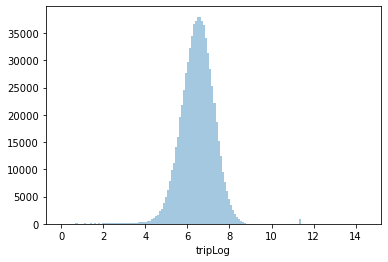

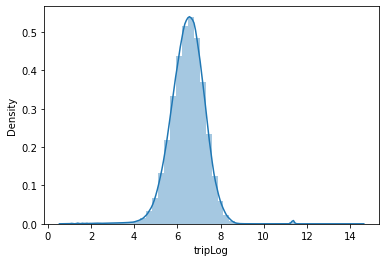

In [26]:
#using log
data['tripLog'] = np.log(data['trip_duration'])
plt.subplot(111)
sns.distplot(data['tripLog'], kde = False, bins = 150)
plt.show()

#this may result in negative to avoid we will add 1 
data['tripLog'] = np.log(data['trip_duration'].values+1)
#plt.subplot(123)
sns.distplot(data['tripLog'])
plt.show()

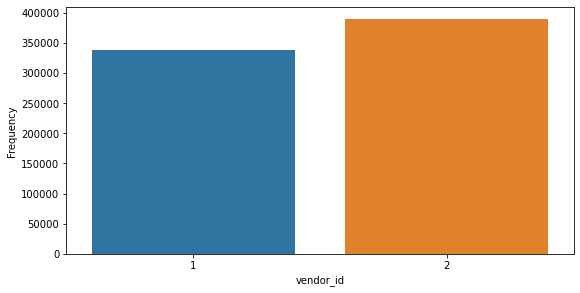

vendor 2 has suplied more cabs


In [38]:
plt.figure(figsize=(20, 10))
plt.subplot(222)
sns.countplot(data['vendor_id'])
plt.xlabel('vendor_id')
plt.ylabel('Frequency')
plt.show()
print("vendor 2 has suplied more cabs")

Text(0, 0.5, 'Frequency')

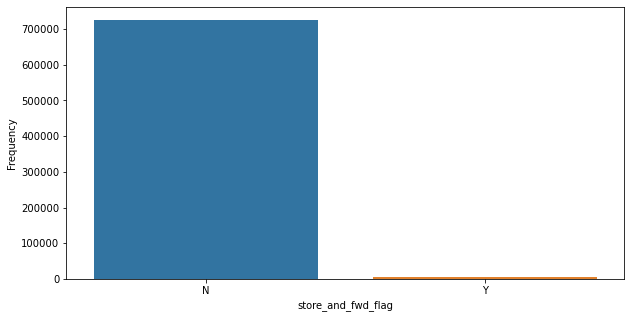

In [36]:
plt.figure(figsize=(10, 5))
sns.countplot(data['store_and_fwd_flag'])
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Frequency')

we shall find the corr between numerical columns

In [43]:
data.corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,tripLog
vendor_id,1.000000,0.286463,0.008198,0.002861,0.002371,0.005259,0.027752,0.019439
passenger_count,0.286463,1.000000,0.001163,-0.004696,-0.000027,-0.003944,0.013022,0.020749
pickup_longitude,0.008198,0.001163,1.000000,0.047635,0.780647,0.118473,0.035447,0.112302
pickup_latitude,0.002861,-0.004696,0.047635,1.000000,0.119970,0.479352,-0.038163,-0.142551
dropoff_longitude,0.002371,-0.000027,0.780647,0.119970,1.000000,0.149598,0.020664,0.072944
dropoff_latitude,0.005259,-0.003944,0.118473,0.479352,0.149598,1.000000,-0.028283,-0.124989
trip_duration,0.027752,0.013022,0.035447,-0.038163,0.020664,-0.028283,1.000000,0.327624
tripLog,0.019439,0.020749,0.112302,-0.142551,0.072944,-0.124989,0.327624,1.000000


We shall plot a map between all the values

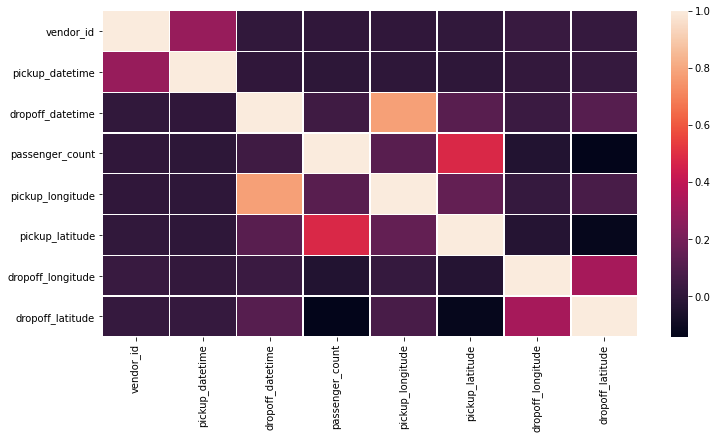

In [52]:
plt.figure(figsize=(12, 6))
df1 = data.drop(['id','tripLog','store_and_fwd_flag','trip_duration'],
        axis=1)
ax = sns.heatmap(data.corr(), xticklabels=df1.columns, yticklabels=df1.columns, 
                 linewidths=.2)


As we have datatime type in our dataset we can do some analysis on them !

Text(0, 0.5, 'Total number of pickups')

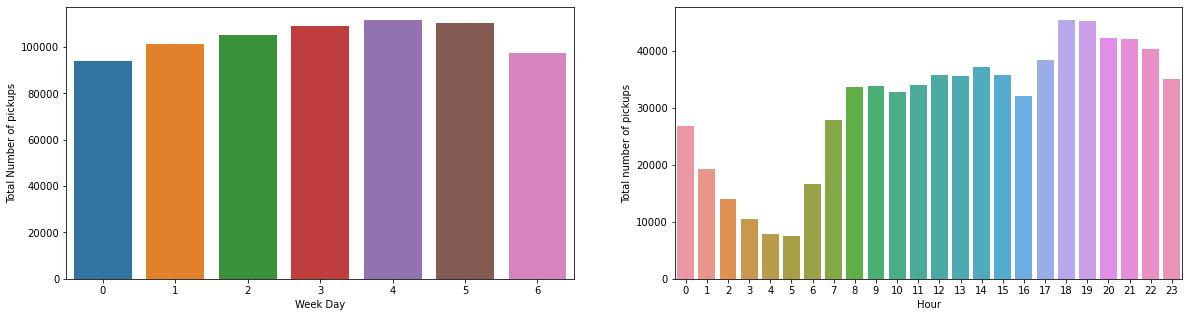

In [59]:
#we should get data and time seperate from datetime.

#geting the day in the week
data['dw'] = data['pickup_datetime'].dt.weekday

#getting the hour in the day
data['hd'] = data['pickup_datetime'].dt.hour


# Datetime features
plt.figure(figsize=(20, 5))

# Passenger Count
plt.subplot(121)
sns.countplot(data['dw'])
plt.xlabel('Week Day')
plt.ylabel('Total Number of pickups')

# vendor_id
plt.subplot(122)
sns.countplot(data['hd'])
plt.xlabel('Hour')
plt.ylabel('Total number of pickups')

Points :

    0-Sunday.....6-Saturday
Sunday and Saturday are having low trips when we compare with weekdays and also high on Thursday.And trips are high in evening hour in the day. 18th and 19th hours 